##Problema:
Considere o arquivo JSON em anexo contendo um ranking das cidades mais
populosas dos Estados Unidos. Vamos usar uma simplificação de que a existência
de estrada entre duas cidades está relacionada à distância euclidiana (planar) entre
as cidades. Então, de acordo com um parâmetro “r”, se a distância entre duas
cidades for menor ou igual a “r”, então existe estrada conectando as duas cidades
diretamente.
O problema que você deve solucionar consiste em estabelecer a rota com menor
distância (acumulada) entre duas cidades arbitrárias. No cenário de empate entre
duas cidades, pode usar como regra o atributo “population”, priorizando a visitação
de cidades com menor população.


In [ ]:
import json
import math
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# --- Carrega os dados JSON ---
def load_cities(filepath):
    with open(filepath, "r") as f:
        cities_data = json.load(f)

    cities = []
    for city in cities_data:
        cities.append({
            "name": city["city"],
            "latitude": city["latitude"],
            "longitude": city["longitude"],
            "population": int(city["population"].replace(",", ""))
        })
    return cities

In [ ]:
# --- Distância Euclidiana entre duas cidades ---
def euclidean_distance(city1, city2):
    return math.sqrt((city1["latitude"] - city2["latitude"])**2 + (city1["longitude"] - city2["longitude"])**2)

In [ ]:
# --- Constrói o grafo com base no raio r ---
def build_graph(cities, r):
    G = nx.Graph()
    for city in cities:
        G.add_node(city["name"], pos=(city["longitude"], city["latitude"]), population=city["population"])

    for i in range(len(cities)):
        for j in range(i + 1, len(cities)):
            dist = euclidean_distance(cities[i], cities[j])
            if dist <= r:
                G.add_edge(cities[i]["name"], cities[j]["name"], weight=dist)
    return G

In [ ]:
# --- Dijkstra com desempate por população ---
def shortest_path_with_population_tiebreak(G, source, target):
    visited = set()
    pq = [(0, G.nodes[source]['population'], source, [])]  # (dist, pop, cidade, caminho)

    while pq:
        (dist, pop, current, path) = heapq.heappop(pq)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]
        if current == target:
            return path, dist
        for neighbor in G.neighbors(current):
            if neighbor not in visited:
                edge_weight = G[current][neighbor]['weight']
                neighbor_pop = G.nodes[neighbor]['population']
                heapq.heappush(pq, (dist + edge_weight, neighbor_pop, neighbor, path))
    return None, float('inf')

In [ ]:
# --- Visualiza o grafo completo ---
def plot_graph(G):
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(14, 10))
    nx.draw(G, pos, node_size=20, with_labels=False, edge_color='gray')
    plt.title("Conexões entre cidades com base no raio r")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

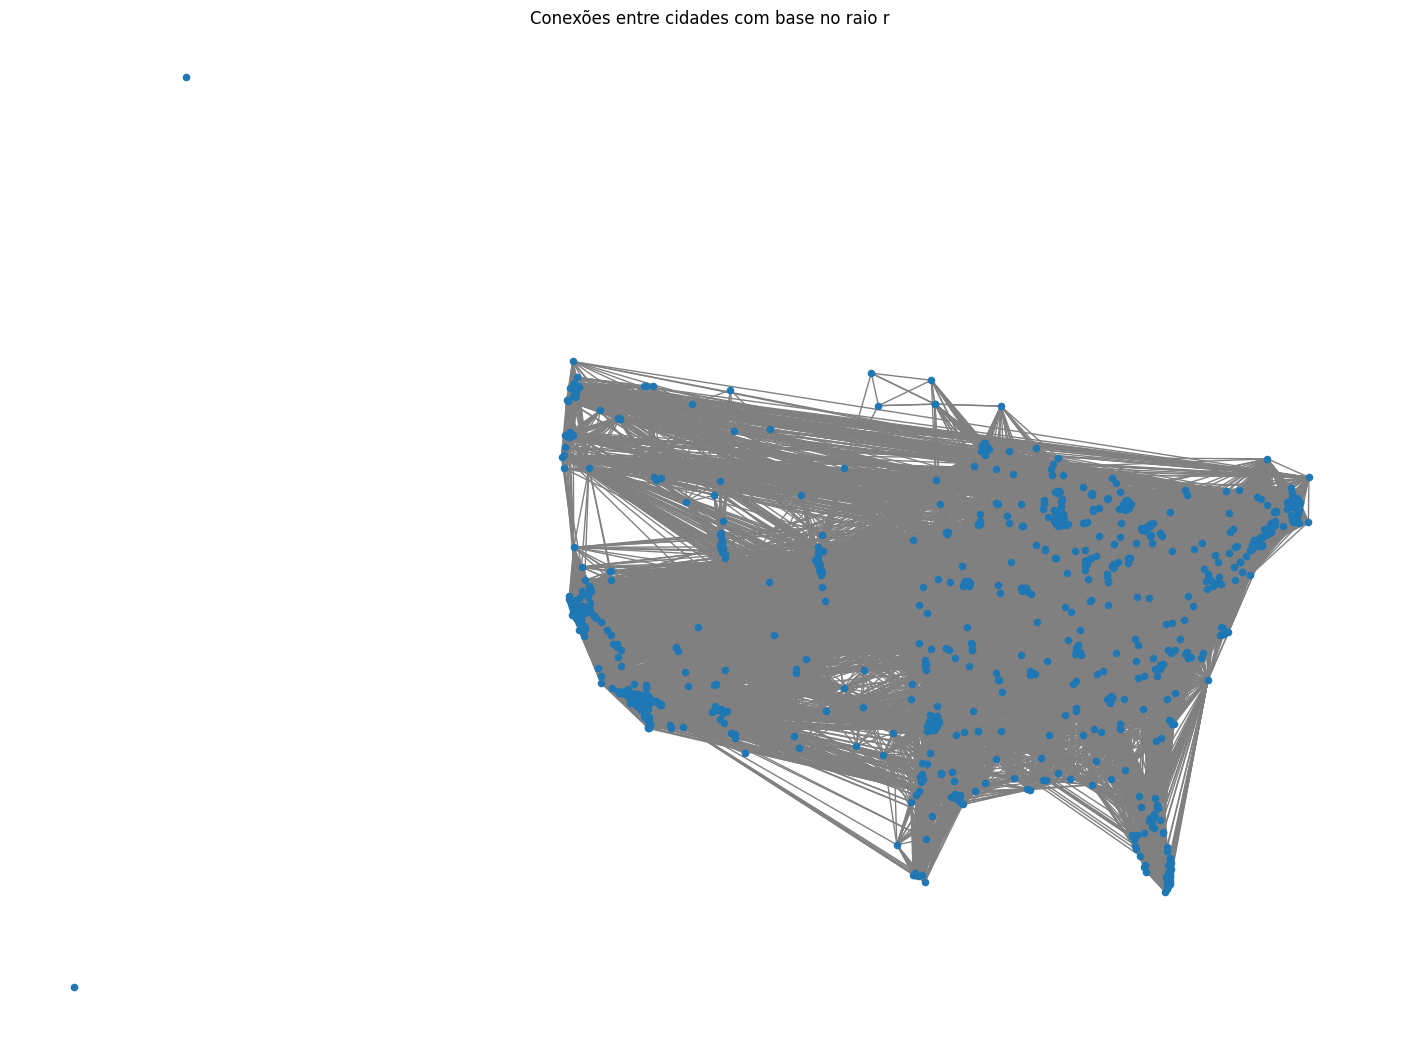

Caminho: ['Dallas', 'Lancaster', 'Palmdale', 'Pasadena', 'Houston']
Distância total: 0.91


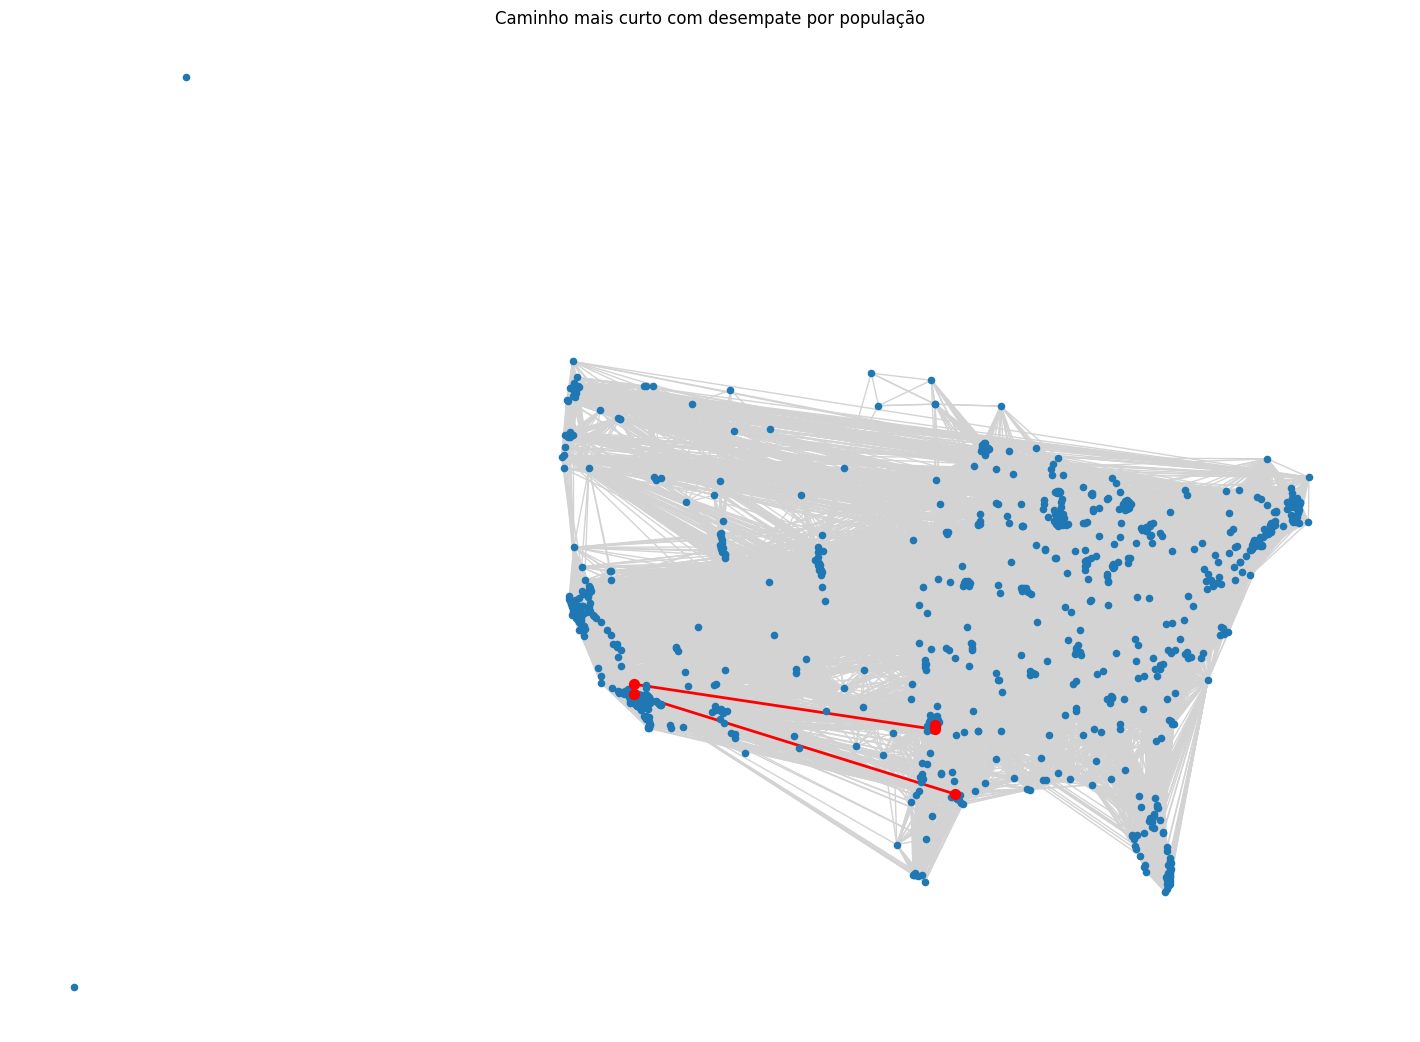

In [ ]:
# --- Exemplo de uso ---
if __name__ == "__main__":
    filepath = "cities.json"
    cities = load_cities(filepath)
    r = 5  # raio de conexão entre cidades
    source = "Dallas"
    target = "Houston"

    G = build_graph(cities, r)
    plot_graph(G)

    path, distance = shortest_path_with_population_tiebreak(G, source, target)
    print(f"Caminho: {path}")
    print(f"Distância total: {distance:.2f}")

    if path:
        plot_path(G, path)